# UBC Minecraft Server Player Behavior Analysis: Planning Report

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


## Part 1: Data Description

In [3]:
players<-read_csv("data/players.csv")

sessions<-read_csv("data/sessions.csv")
players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


## Part 1: Data Description

### Dataset Overview
- **`players.csv`**:**196 observations** and **7 variables** 
- **`sessions.csv`**: **1535 observations** and **5 variables** 

### Variable Definitions

#### `players.csv`
| Variable | Type | Description |
|--------|------|-------------|
| `experience` | Character| player_type |
| `subscribe	` | Logical | Whether the player subscribed to the game-related newsletter |
| `hashedEmail` | Character |ID |
| `played_hours` | Numeric | Total hours played|
| `name` | Character | Player name |
| `gender` | Character | Gender |
| `Age` | Character | Age in years|

#### `sessions.csv`
| Variable | Type | Description |
|--------|------|-------------|
| `hashedEmail` | Character | Links to `player_id` in `players.csv` |
| `start_time` | Character |start time in `"DD/MM/YYYY HH:MM"`|
| `end_time` | Character |  end time|
| `original_start_time` | Numeric | Start Unix timestamp |
| `original_end_time` | Numeric | End Unix timestamp |

### Observed Data Issues
- **Missing age values**: age contains "NA" strings 

### Potential Hidden Issues
- **Sampling bias**: Players were likely recruited non-randomly, so results may not generalize to all Minecraft players.
- **Self-reported data**: `age` and `gender` rely on player input and may be inaccurate or incomplete.

### Data Collection Method
Data were collected by a UBC CS research team. Player actions and session logs were automatically recorded.

### Summary statistics

In [7]:
players_mean <- players |>
  select(played_hours, Age) |>
  summarise(
    across(everything(), ~ round(mean(.x, na.rm = TRUE), 2))
  )
sessions_mean <- sessions|>
  select(original_start_time,original_end_time) |>
  summarise(
    across(everything(), ~ round(mean(.x, na.rm = TRUE), 2))
  )
players_mean
sessions_mean

played_hours,Age
<dbl>,<dbl>
5.85,21.14


original_start_time,original_end_time
<dbl>,<dbl>
1.719201e+12,1.719196e+12


## Part 2 : Questions
- **broad question**: Q1
- **Can a player’s total play time and age predict whether they subscribe to the newsletter in the player dataset?**
- The dataset includes age, played_hours, and subscribe. I will keep these columns, , remove any missing values, and standardize the two predictors.This creates a clean, scaled feature set suitable for KNN classification, which relies on distance between observations.

## Part 3: Exploratory Data Analysis and Visualization


In [3]:
players<-read_csv("data/players.csv")

sessions<-read_csv("data/sessions.csv")
players
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [9]:
players_mean<-players|>
select(played_hours, Age) |>
   summarise(
    across(everything(), ~ mean(.x, na.rm = TRUE))
  )
players_mean

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


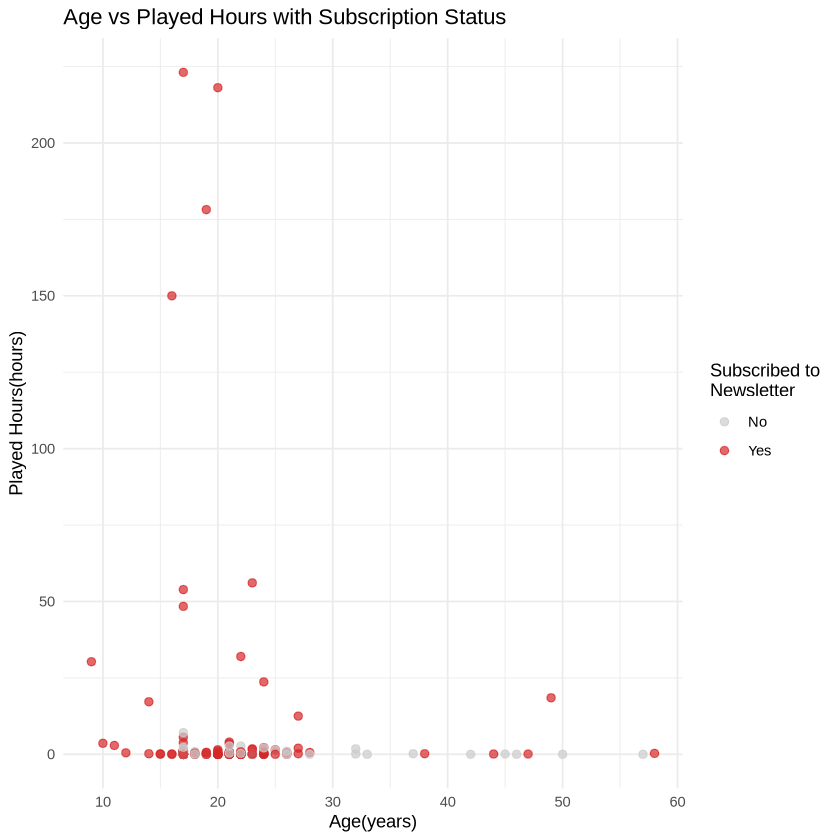

In [20]:
player_scatter<-ggplot(players, aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point(alpha = 0.7, size = 2) +
  scale_color_manual(
    values = c("FALSE" = "#CCCCCC", "TRUE" = "#D62728"), 
    labels = c("No", "Yes"),
    name = "Subscribed to\nNewsletter"
  ) +
  labs(title = "Age vs Played Hours with Subscription Status",
       x = "Age(years)",
       y = "Played Hours(hours)",
       color = "Subscribed") +
  theme_minimal()
player_scatter

Younger, high-play-time players are more likely to subscribe; most subscribers have high play time; non-subscribers cluster at low play time; clustered pattern.

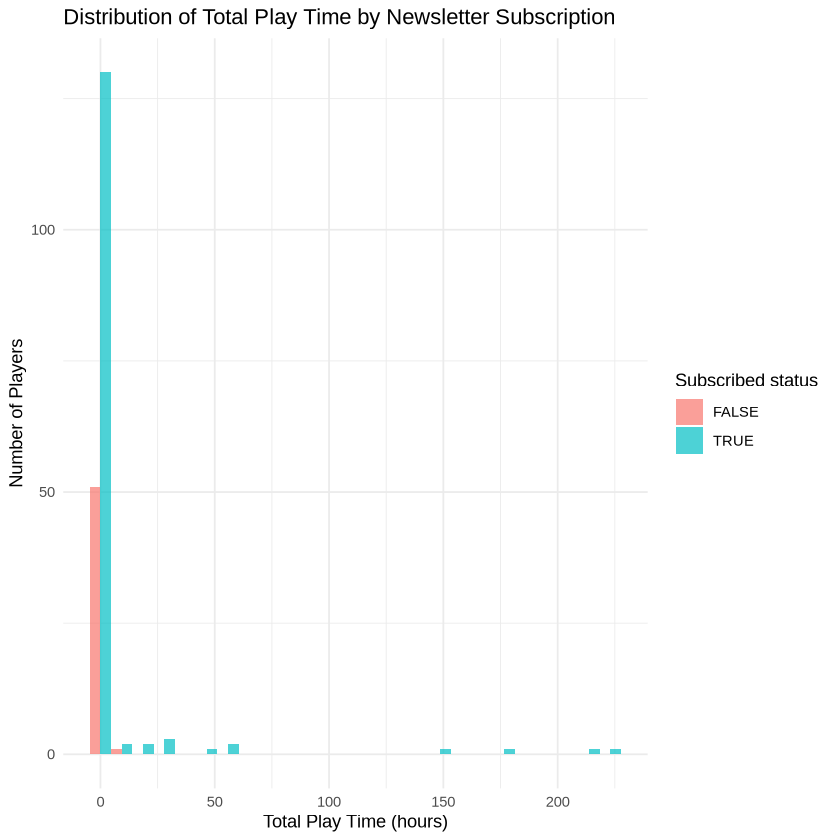

In [26]:
players_histogram<-ggplot(players, aes(x = played_hours, fill = subscribe)) +
  geom_histogram(bins = 25, position = "dodge", alpha = 0.7) +
  labs(
    title = "Distribution of Total Play Time by Newsletter Subscription",
    x = "Total Play Time (hours)",
    y = "Number of Players",
    fill = "Subscribed status"
  ) +
  theme_minimal()
players_histogram

Subscribers tend to have higher play time. Most subscribers play >10 hours, while non-subscribers cluster near 0.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


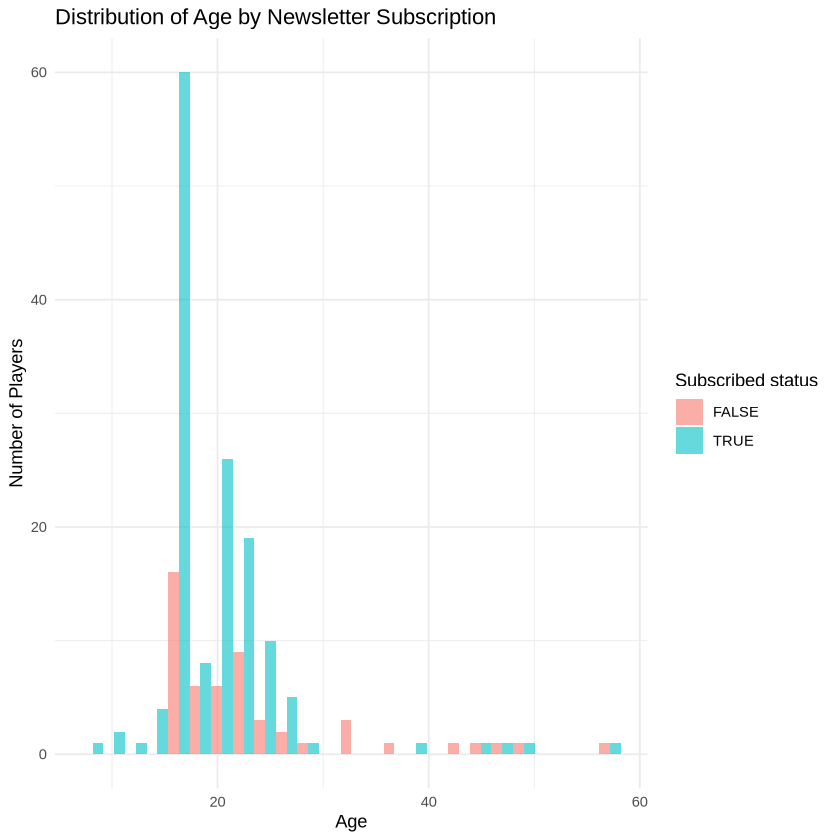

In [25]:
players_histogram<-ggplot(players, aes(x = Age, fill = subscribe)) +
  geom_histogram(bins = 25, alpha = 0.6, position="dodge") + 
  labs(
    title = "Distribution of Age by Newsletter Subscription",
    x = "Age",
    y = "Number of Players",
    fill = "Subscribed status"
  ) +
  theme_minimal()
players_histogram

Subscribers are younger; non-subscribers skew older. Most subscribers are under 25, while non-subscribers peak at 30+.

## Part 4: Methods and Plan

I will choose Classification with K-nearest neighbors.

KNN works well for small to medium-sized datasets (n=198). Since the target variable is binary, KNN can classify players based on age and played hours.

KNN assumes nearby points have similar labels and that distance reflects meaningful similarity.

KNN can be sensitive to irrelevant or scaled features, and may perform poorly if classes are imbalanced.

I will use  accuracy, precision and recall to evaluate model performance. And split the dataset into multiple subsets and use cross-validation to select the best K value.

I wil Split the data into 70% training and 30% test sets. Then standardize age and total_play_time_hours in the training set and apply the same transformation to the test set. And use 5-fold cross-validation on the training set for hyperparameter tuning.

## Part 5: Github

https://github.com/tommyxie0stu/UBC-ds-minecraft-data-planning.git